In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline

In [3]:
sns.set_theme(style="ticks", palette=['black'],font_scale=1)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [10]:
s3_url = '/Users/jinyanxiang/Desktop/Manuscript/revision_1/studies/S3_main_tool_sharing/Study 3 - data.csv'
s4_url = '/Users/jinyanxiang/Desktop/Manuscript/revision_1/studies/S4_med_lending/Study 4 - data.csv'
s5_url = '/Users/jinyanxiang/Downloads/SE_revision_4.2.csv'
s5_url = pd.read_csv(s5_url)

In [17]:
df_s2 = pd.read_csv(s2_url)
df_s2.head()

,Response ID,age,gender,income,exp,willingness,check,inequality_1,inequality_2,inequality_3,...,hispanic,race_White,race_AA,race_indian_native,race_Asian,race_Hawaiian_PacificIslander,race_other,race_not_to_say,bad_response,host_exp
0,115454742,26,1,3.0,1,6,South Africa,4,4,4,...,2,1,0,0,0,0,0,0,0,1
1,115454754,38,2,11.0,1,5,South Africa,5,7,6,...,2,1,0,0,0,0,0,0,0,1
2,115454769,32,1,5.0,1,6,south africa,6,5,5,...,1,1,0,0,0,0,0,0,0,1
3,115454778,34,2,4.0,1,6,South Africa,2,6,6,...,2,1,0,0,0,0,0,0,0,1
4,115454783,24,2,5.0,1,7,South Africa,2,3,5,...,2,0,1,0,0,0,0,0,0,1


In [10]:
df_s2['inequality_mean'] = df_s2[['inequality_1','inequality_2', 'inequality_3']].mean(axis = 1)

In [11]:
df_s2.columns

Index(['Response ID', 'Response Status', 'IP Address',
       'Timestamp (mm/dd/yyyy)', 'Time Taken to Complete (Seconds)', 'age',
       'gender', 'income', 'exp', 'willingness', 'check', 'inequality_1',
       'inequality_2', 'inequality_3', 'platform', 'exp_m', 'exp_y',
       'exp_length', 'hispanic', 'race_White', 'race_AA', 'race_indian_native',
       'race_Asian', 'race_Hawaiian_PacificIslander', 'race_other',
       'race_not_to_say', 'bad_response', 'host_exp', 'inequality_mean'],
      dtype='object')

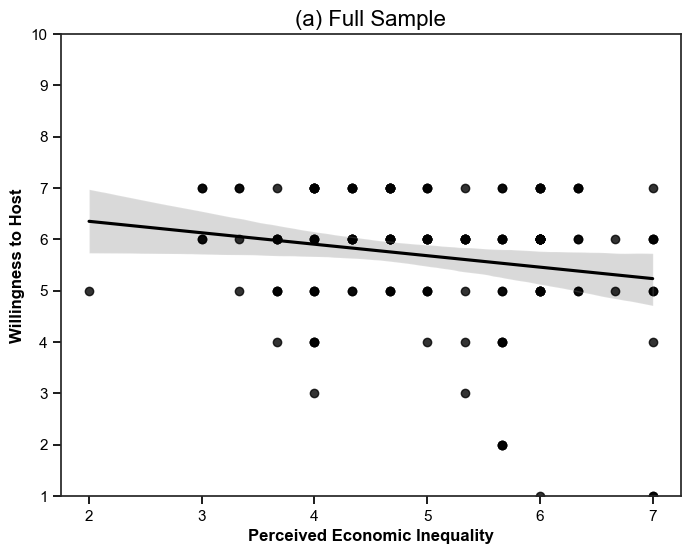

In [23]:
plt.figure(figsize = (8,6))


sns.regplot(data=df_s2, 
             x="inequality_mean", y="willingness")

plt.ylim((1,10))
plt.ylabel('Willingness to Host', fontsize = 12, fontweight='bold')
plt.xlabel('Perceived Economic Inequality', fontsize = 12, fontweight='bold')
plt.title('(a) Full Sample', fontsize = 16)


plt.show()

## Study 3

#### <i> draw a bar chart to demostrate the difference in willingess to rent a tool by the renter's regional economic inequality

In [11]:
df_s3 = pd.read_csv(s3_url)
df_s3.head()

,Response ID,inequality,willingness,check_1,check_2,exp_any,exp_specific,exp_spe_length_y,exp_spe_length_m,exp_general,...,age,hispanic,race_W,race_AA,race_Indian_Native,race_A,race_Hawaiian_PacificIslander,race_other,race_not_to_say,income
0,116525730,1,4,2,2,2,2,NaN,NaN,2,...,41,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5
1,116525732,1,3,3,3,1,2,NaN,NaN,1,...,46,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4
2,116525733,1,5,7,7,2,2,NaN,NaN,2,...,49,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8
3,116525738,1,1,7,7,2,2,NaN,NaN,2,...,32,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2
4,116525744,1,5,5,6,1,2,NaN,NaN,1,...,31,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11


In [12]:
df_s3.reset_index(inplace = True)

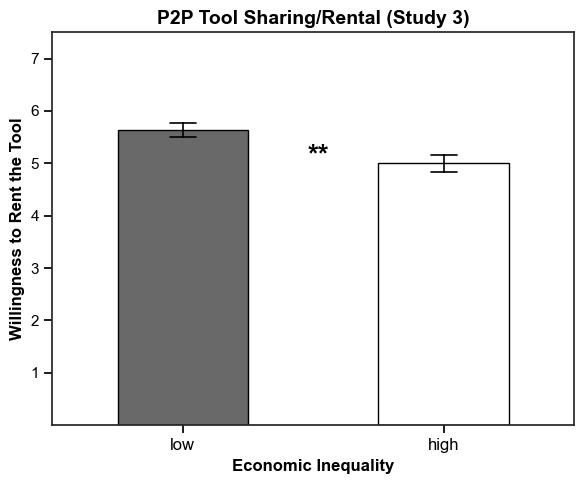

In [13]:
plt.figure(figsize = (6,5))
plt.ylim((0,7.5))

sns.barplot(data=df_s3, 
            x="inequality", y="willingness", hue = 'inequality',
            errorbar=("se", 1), capsize = 0.1, saturation= 1, 
            err_kws={'color': 'black', 'linewidth': 1.2},
            width=0.5,
            palette=['dimgray','white'],edgecolor = 'black', legend=False)


plt.ylabel('Willingness to Rent the Tool', fontsize = 12, fontweight='bold')
plt.xlabel('Economic Inequality', fontsize = 12, fontweight='bold')
plt.title('P2P Tool Sharing/Rental (Study 3)', fontsize = 14, fontweight='bold')

plt.text(0.48, 5, "**", fontsize = 20, fontweight = 'bold')
plt.xticks([0,1], ['low', 'high'], fontsize = 12, ha ='center')
plt.yticks([1,2,3,4,5,6,7])

plt.tight_layout()
plt.show()

## Study 4
#### <i> draw bar charts to demostrate the difference in willingess to lend and borrowers' lending amount by the lender's regional economic inequality

In [14]:
df_s4 = pd.read_csv(s4_url)
df_s4.head()

,Response ID,recap_term,recap_rate,recap_default,recap_comp,recap_term_rep,recap_rate_rep,recap_default_rep,recap_comp_rep,recap_code,...,age,hispanic,race_White,race_AA,race_indian_native,race_Asian,race_Hawaiian_PacificIslander,race_other,race_not_to_say,income
0,117108283,1,2,1,2,1.0,2.0,1.0,2.0,1,...,32.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,117108286,1,2,1,2,1.0,2.0,1.0,2.0,1,...,44.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2,117108287,1,2,1,2,1.0,2.0,1.0,2.0,1,...,45.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,117108294,1,2,1,2,1.0,2.0,1.0,2.0,1,...,73.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,117108295,1,2,1,2,1.0,2.0,1.0,2.0,1,...,56.0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [15]:
#drop participants who failed the information check
df_s4_sub = df_s4.query('recap_code == 1')

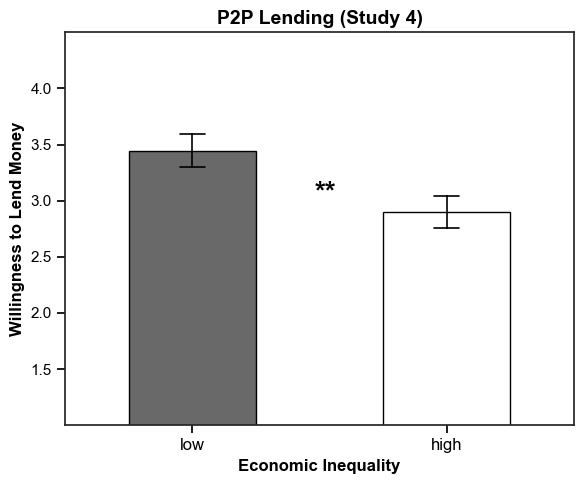

In [16]:
plt.figure(figsize = (6,5))
plt.ylim((1,4.5))

sns.barplot(data=df_s4_sub,
            x="inequality", y="willingness",  hue = 'inequality',
            errorbar=("se", 1), capsize = 0.1, saturation= 1, err_kws={'color': 'black', 'linewidth': 1.2},
            width=0.5,
            palette=['dimgray','white'],edgecolor = 'black',legend=False)


plt.ylabel('Willingness to Lend Money', fontsize = 12, fontweight='bold')
plt.xlabel('Economic Inequality', fontsize = 12, fontweight='bold')
plt.title('P2P Lending (Study 4)', fontsize = 14, fontweight='bold')

plt.text(0.48, 3, "**", fontsize = 20, fontweight = 'bold')
plt.xticks([0,1], ['low', 'high'], fontsize = 12, ha ='center')
plt.yticks([1.5,2,2.5,3,3.5,4])

plt.tight_layout()
plt.show()

In [17]:
#get the median
df_s4_sub['lending_amount'].median()

506.0

In [18]:
#dichomotize based on median (to supplement the Moody's median test
df_s4_sub['median_coded'] = np.where(df_s4_sub['lending_amount'] <= df_s4_sub['lending_amount'].median(), 0, 1)

/var/folders/r9/fw5bm81j1h72ff0690bt25x80000gn/T/ipykernel_13853/1339128367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s4_sub['median_coded'] = np.where(df_s4_sub['lending_amount'] <= df_s4_sub['lending_amount'].median(), 0, 1)


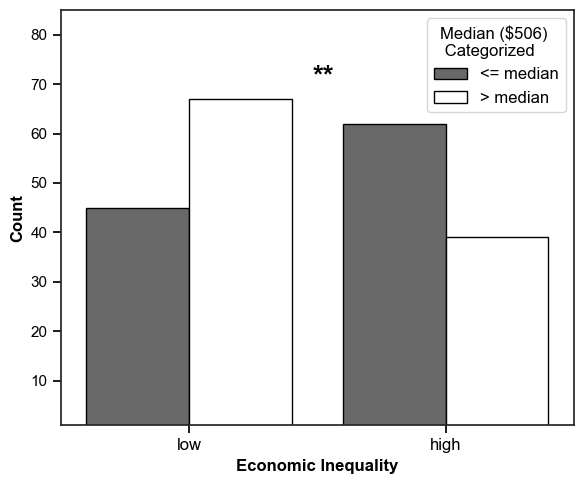

In [27]:
plt.figure(figsize = (6,5))
plt.ylim((1,85))

sns.countplot(data=df_s4_sub,
             x = 'inequality', hue = 'median_coded', hue_order = [0, 1], stat= 'count', 
            palette=['dimgray','white'],edgecolor = 'black')


plt.ylabel('Count', fontsize = 12, fontweight='bold')
plt.xlabel('Economic Inequality', fontsize = 12, fontweight='bold')


plt.text(0.48, 70, "**", fontsize = 20, fontweight = 'bold')
plt.xticks([0,1], ['low', 'high'], fontsize = 12, ha ='center')
plt.legend(title = 'Median ($506) \n Categorized', fontsize = 12, labels = ['<= median','> median'])

plt.tight_layout()
plt.show()

In [28]:
#clculate the percentages within each inequality condition
total_counts = df_s4_sub.groupby('inequality')['median_coded'].count()
percentages_low = df_s4_sub[df_s4_sub['inequality'] == 0]['median_coded'].value_counts(normalize=True) * 100
percentages_high = df_s4_sub[df_s4_sub['inequality'] == 1]['median_coded'].value_counts(normalize=True) * 100

In [30]:
percentages_low

1    59.821429
0    40.178571
Name: median_coded, dtype: float64

In [31]:
percentages_high

0    61.386139
1    38.613861
Name: median_coded, dtype: float64

In [32]:
df_s4_sub_percent = pd.DataFrame({
    'inequality': ['low', 'low', 'high', 'high'],
    'median_coded': ['<= median', '> median', '<= median', '> median'],
    'percentage': [40.18, 59.82, 61.39, 38.61]
})

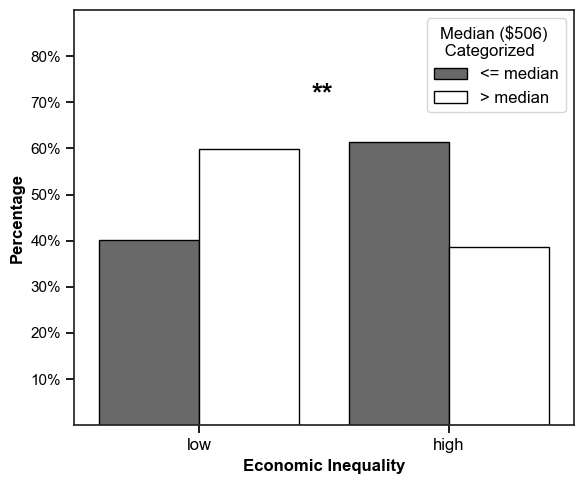

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

plt.ylim((0, 90))

sns.barplot(data=df_s4_sub_percent, 
                x="inequality", y="percentage",width=0.8, hue = 'median_coded', saturation= 1,err_kws={'color': 'black', 'linewidth': 1},
                palette=['dimgray','white'],edgecolor = 'black')


plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.xlabel('Economic Inequality', fontsize=12, fontweight='bold')
plt.xticks([0, 1], ['low', 'high'], fontsize=12, ha='center')

y_ticks = [i * 10 for i in range(1, 9)]
plt.yticks(y_ticks, [f'{i}%' for i in y_ticks])
plt.legend(title='Median ($506) \n Categorized', fontsize=12)

plt.text(0.45, 70, "**", fontsize = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

## Study 5 
#### <i> draw a Johnson-Neyman graph to demostrate the moderating role of perceived interpersonal similarity

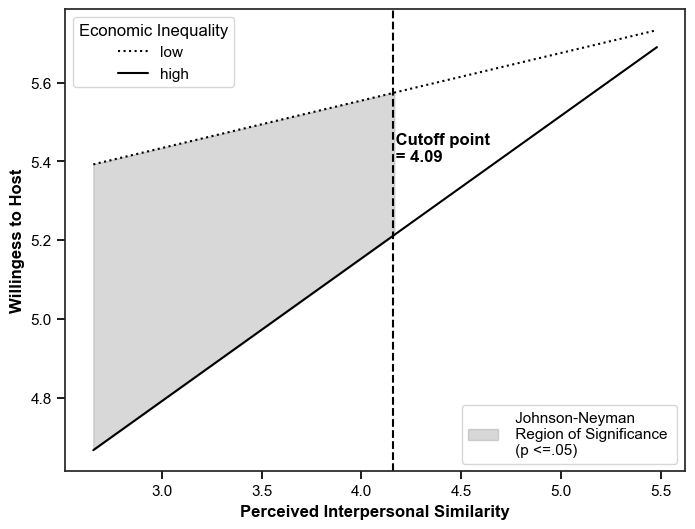

In [60]:
import matplotlib.pyplot as plt


plt.figure(figsize = (8,6))
plt.text(4.15, 5.4, " Cutoff point \n = 4.09", fontweight = 'bold')

inequali = [0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000]
SCO = [2.6580, 2.6580, 4.0683, 4.0683, 4.1645, 4.1645, 5.4787, 5.4787]
prob = [5.3923, 4.6664, 5.5627, 5.1782 , 5.5745,5.2131, 5.7332 , 5.6900]

legend_labels = ['low', 'high']

plt.plot(SCO[::2], prob[::2], linestyle=':', color='black',  label='Economic Inequality 0')
plt.plot(SCO[1::2], prob[1::2], linestyle='-', color='black', label='Economic Inequality 1')

plt.axvline(x=4.16, color='black', linestyle='--', label='Vertical Line')
plt.fill_between(SCO[1::2], prob[1::2], prob[::2], where=[x < 4.165 for x in SCO[1::2]], color='grey', alpha=0.3)

area_patch = mpatches.Patch(color='grey', alpha=0.3, label=' Johnson-Neyman \n Region of Significance \n (p <=.05)')

area_legend = plt.legend(handles=[area_patch], loc='lower right')

plt.gca().add_artist(area_legend)

plt.xlabel('Perceived Interpersonal Similarity', fontsize = 12, ha = 'center', fontweight = 'bold')
plt.ylabel('Willingess to Host',fontsize = 12, ha = 'center',  fontweight = 'bold')

plt.legend(title='Economic Inequality', labels=legend_labels)

plt.show()